# <font color='red'>BackPropagation</font>

**There will be some functions that start with the word "grader" ex: grader_sigmoid(), grader_forwardprop(), grader_backprop() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

## <font color='red'>Loading data </font>

In [1]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import math
import numpy as np
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

# <font color='red'>Task 1: Implementing backpropagation and Gradient checking </font>

<font color='blue'><b>Check this video for better understanding of the computational graphs and back propagation</font>

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")


*  <b>Write two functions<br>
    *  Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

    <pre>
    <font color='green'>
def forward_propagation(X, y, W):
        <font color='grey'>
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph, <br>         ..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # now compute remaining values from computional graph and get y'
        # write code to compute the value of L=(y-y')^2
        # compute derivative of L  w.r.to Y' and store it in dl
        # Create a dictionary to store all the intermediate values
        # store L, exp,tanh,sig,dl variables
        </font>
        return (dictionary, which you might need to use for back propagation)
        <font color='grey'>
        </font>
</font>
</pre>
    *  <b>Backward propagation</b>(Write your code in<font color='blue'> def backward_propagation()</b></font>)
    </b>
    <pre>
    <font color='green'>
    def backward_propagation(L, W,dictionary):
        <font color='grey'>
        # L: the loss we calculated for the current point
        # dictionary: the outputs of the forward_propagation() function
        # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
        # Hint: you can use dict type to store the required variables 
        # return dW, dW is a dictionary with gradients of all the weights
        </font>
        return dW
        </font>
</font>
</pre>

 ## <font color='red'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (Write your code in <font color='blue'> def gradient_checking()</font>)

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 3 type of optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* Initilze the 9 weights from normal distribution with mean=0 and std=0.01

**Check below video and <a href='https://cs231n.github.io/neural-networks-3/'>this</a> blog**

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-100):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights


**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

<br>
<br>
<br>

# <font color='red'>Task 1 </font>

## <font color='blue'>Forward propagation </font>

In [4]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation 
    return 1/(1+math.exp(-z))
    
def forward_propagation(x, y, w):
        #'''In this function, we will compute the forward propagation '''
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        exp = math.exp(((w[0]*x[0] + w[1]*x[1])**2) + w[5])
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        tanh = np.tanh(exp + w[6])
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        sig = sigmoid(np.sin(w[2]*x[2])*(w[3]*x[3] + w[4]*x[4]) + w[7])
        # now compute remaining values from computional graph and get y'
        y_dash = tanh + (w[8]*sig)
        # write code to compute the value of L=(y-y')^2
        loss = (y - y_dash)**2
        # compute derivative of L  w.r.to Y' and store it in dl
        dl = -2 * (y - y_dash)
        # Create a dictionary to store all the intermediate values
        data = {"exp":exp,"tanh":tanh,"sigmoid": sig , "loss":loss, "dy_pr":dl}
        # store L, exp,tanh,sig variables
        return data

<font color='cyan'>Grader function - 1</font>

In [5]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

<font color='cyan'>Grader function - 2 </font>

In [6]:
def grader_forwardprop(data):
    dl = (data['dy_pr']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

## <font color='blue'>Backward propagation</font>

In [7]:
def backward_propagation(L,W,dict):
    '''In this function, we will compute the backward propagation '''
    # L: the loss we calculated for the current point
    # dictionary: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables
    dw7 = (1-(dict['tanh'])**2)*dict['dy_pr']
    dw6 = dict['exp'] * dw7
    dw1 = dw6*2*L[0]*(W[0]*L[0] + W[1]*L[1])
    dw2 = L[1]*(W[0]*L[0] + W[1]*L[1])*dw6*2
    dw9 = dict['dy_pr']*dict['sigmoid']
    dw8 = W[8]*dict['dy_pr']*dict['sigmoid']*(1-dict['sigmoid'])
    dw3 = L[2]*math.cos(W[2]*L[2])*((W[3]*L[3])+(W[4]*L[4]))*dw8
    dw4 = math.sin(W[2]*L[2])*dw8* L[3]
    dw5 = math.sin(W[2]*L[2])*dw8* L[4]
    dw = {"dw1":dw1,"dw2":dw2,"dw3":dw3,"dw4":dw4,"dw5":dw5,"dw6":dw6,"dw7":dw7,"dw8":dw8,"dw9":dw9}
    return dw
    # return dW, dW is a dictionary with gradients of all the weights

<font color='cyan'>Grader function - 3 </font>

In [8]:
def grader_backprop(data):
    dw1=(data['dw1']==-0.22973323498702003)
    dw2=(data['dw2']==-0.021407614717752925)
    dw3=(data['dw3']==-0.005625405580266319)
    dw4=(data['dw4']==-0.004657941222712423)
    dw5=(data['dw5']==-0.0010077228498574246)
    dw6=(data['dw6']==-0.6334751873437471)
    dw7=(data['dw7']==-0.561941842854033)
    dw8=(data['dw8']==-0.04806288407316516)
    dw9=(data['dw9']==-1.0181044360187037)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
d1=backward_propagation(X[0],w,d1)
grader_backprop(d1)

True

## <font color='blue'> Implement gradient checking</font>

In [9]:
W = np.ones(9)*0.1
def gradient_checking(data_point, W,y):
    # compute the L value using forward_propagation()
    data_fp = forward_propagation(data_point,y,W)
    # compute the gradients of W using backword_propagation()
    data_bp = backward_propagation(data_point,W,data_fp)
    approx_gradients = []
    gradient_check = []
    e = 0.0001
    W_copy = np.copy(W)
    x = data_point
    Y = y
    #for each wi weight value in W:
    for index in range(0,len(W_copy)):
        # add a small value to weight wi, and then find the values of L with the updated weights
        W_copy[index] = W_copy[index] + e
        exp = math.exp(((W_copy[0]*x[0] +W_copy[1]*x[1])**2) + W_copy[5])
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        tanh = np.tanh(exp + W_copy[6])
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        sig = sigmoid(np.sin(W_copy[2]*x[2])*(W_copy[3]*x[3] + W_copy[4]*x[4]) + W_copy[7])
        # now compute remaining values from computional graph and get y'
        y_dash = tanh + (W_copy[8]*sig)
        L_plus = (Y - y_dash)**2
        W_copy[index] = W[index]
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        W_copy[index] = W_copy[index] - e
        exp = math.exp(((W_copy[0]*x[0] +W_copy[1]*x[1])**2) + W_copy[5])
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        tanh = np.tanh(exp + W_copy[6])
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        sig = sigmoid(np.sin(W_copy[2]*x[2])*(W_copy[3]*x[3] + W_copy[4]*x[4]) + W_copy[7])
        # now compute remaining values from computional graph and get y'
        y_dash = tanh + (W_copy[8]*sig)
        L_minus = (Y - y_dash)**2
        W_copy[index] = W[index]
        # compute the approximation gradients of weight wi
        approx_gradient = (L_plus-L_minus)/(2*e)
        #approx_gradients.append(approximation gradients of weight wi)
        approx_gradients.append(approx_gradient)
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with gradient_check formula
    gradient_check.append(abs(abs(data_bp['dw1']) - abs(approx_gradients[0]))/abs(abs(data_bp['dw1']) + abs(approx_gradients[0])))
    gradient_check.append(abs(abs(data_bp['dw2']) - abs(approx_gradients[1]))/abs(abs(data_bp['dw2']) + abs(approx_gradients[1])))
    gradient_check.append(abs(abs(data_bp['dw3']) - abs(approx_gradients[2]))/abs(abs(data_bp['dw3']) + abs(approx_gradients[2])))
    gradient_check.append(abs(abs(data_bp['dw4']) - abs(approx_gradients[3]))/abs(abs(data_bp['dw4']) + abs(approx_gradients[3])))
    gradient_check.append(abs(abs(data_bp['dw5']) - abs(approx_gradients[4]))/abs(abs(data_bp['dw5']) + abs(approx_gradients[4])))
    gradient_check.append(abs(abs(data_bp['dw6']) - abs(approx_gradients[5]))/abs(abs(data_bp['dw6']) + abs(approx_gradients[5])))
    gradient_check.append(abs(abs(data_bp['dw7']) - abs(approx_gradients[6]))/abs(abs(data_bp['dw7']) + abs(approx_gradients[6])))
    gradient_check.append(abs(abs(data_bp['dw8']) - abs(approx_gradients[7]))/abs(abs(data_bp['dw8']) + abs(approx_gradients[7])))
    gradient_check.append(abs(abs(data_bp['dw9']) - abs(approx_gradients[8]))/abs(abs(data_bp['dw9']) + abs(approx_gradients[8])))
    return gradient_check
gradient_check = gradient_checking(X[0], W,y[0])
print(gradient_check)

[1.0370728946337426e-08, 8.174982888388155e-11, 1.7287700041112022e-09, 1.87486944153289e-12, 4.2849738752544037e-10, 7.610196933782967e-10, 3.1480030084674753e-09, 4.0368014625577295e-10, 3.361951351774315e-13]


# <font color='red'>Task 2: Optimizers

In [10]:
def calculateLoss(W):
    y_dash = []
    sum_loss = 0
    for index in range(0,len(X)):
        exp = math.exp(((W[0]*X[index][0] +W[1]*X[index][1])**2) + W[5])
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        tanh = np.tanh(exp + W[6])
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        sig = sigmoid(np.sin(W[2]*X[index][2])*(W[3]*X[index][3] + W[4]*X[index][4]) + W[7])
            # now compute remaining values from computional graph and get y'
        y_dash = tanh + (W[8]*sig)
        sum_loss = sum_loss + (y[index] - y_dash)**2
    return sum_loss

### <font color='blue'>Algorithm with Vanilla update of weights</font>

In [11]:
def vanila_update(W,dw,learning_rate):
    W = W - (learning_rate*dw)
    return W

In [12]:
epochs = 1000
W = np.random.normal(0,0.01,9)
learning_rate = 0.01
W_prev = np.copy(W)
loss_vanilla = []
for epoch in range(0,epochs):
    for index in range(0,len(X)):
        data_fp = forward_propagation(X[index],y[index],W)
        data_bp = backward_propagation(X[index],W,data_fp)
        dw = np.array([data_bp['dw1'],data_bp['dw2'],data_bp['dw3'],data_bp['dw4'],data_bp['dw5'],data_bp['dw6'],data_bp['dw7'],data_bp['dw8'],data_bp['dw9']])
        W = vanila_update(W,dw,learning_rate)
    loss_vanilla.append(calculateLoss(W))
    print("epoch:%d \t loss:%f"%(epoch,loss_vanilla[len(loss_vanilla)-1]))
    if((abs(loss_vanilla[len(loss_vanilla)-1] - loss_vanilla[len(loss_vanilla)-2] )< 0.0001) & (epoch>0)):
        break

epoch:0 	 loss:17.910858
epoch:1 	 loss:18.995827
epoch:2 	 loss:18.969384
epoch:3 	 loss:18.857552
epoch:4 	 loss:18.510104
epoch:5 	 loss:17.486059
epoch:6 	 loss:14.893370
epoch:7 	 loss:10.309887
epoch:8 	 loss:5.764111
epoch:9 	 loss:3.075848
epoch:10 	 loss:1.790236
epoch:11 	 loss:1.188711
epoch:12 	 loss:0.898540
epoch:13 	 loss:0.751932
epoch:14 	 loss:0.673270
epoch:15 	 loss:0.627758
epoch:16 	 loss:0.599030
epoch:17 	 loss:0.579206
epoch:18 	 loss:0.564373
epoch:19 	 loss:0.552512
epoch:20 	 loss:0.542521
epoch:21 	 loss:0.533763
epoch:22 	 loss:0.525843
epoch:23 	 loss:0.518502
epoch:24 	 loss:0.511563
epoch:25 	 loss:0.504901
epoch:26 	 loss:0.498426
epoch:27 	 loss:0.492074
epoch:28 	 loss:0.485800
epoch:29 	 loss:0.479572
epoch:30 	 loss:0.473368
epoch:31 	 loss:0.467175
epoch:32 	 loss:0.460985
epoch:33 	 loss:0.454793
epoch:34 	 loss:0.448598
epoch:35 	 loss:0.442401
epoch:36 	 loss:0.436204
epoch:37 	 loss:0.430011
epoch:38 	 loss:0.423824
epoch:39 	 loss:0.417649
ep

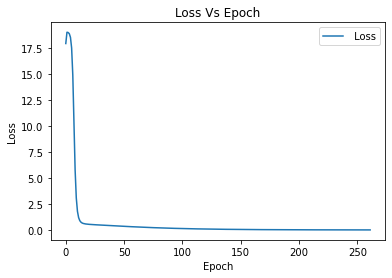

In [13]:
plt.plot(np.array(range(0,len(loss_vanilla))),loss_vanilla, label=' Loss')
plt.title('Loss Vs Epoch')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### <font color='blue'>Algorithm with Momentum update of weights</font>

In [14]:
def momentum_update(W,dw,learning_rate,vt_prev,gamma):
    vt = (vt_prev*gamma) + (learning_rate*dw)
    W = W - vt
    return W,vt

In [15]:
epochs = 1000
gamma = 0.5
W = np.random.normal(0,0.01,9)
learning_rate = 0.01
loss_momentum = []
vt = np.zeros(9)
for epoch in range(0,epochs):
    for index in range(0,len(X)):
        data_fp = forward_propagation(X[index],y[index],W)
        data_bp = backward_propagation(X[index],W,data_fp)
        dw = np.array([data_bp['dw1'],data_bp['dw2'],data_bp['dw3'],data_bp['dw4'],data_bp['dw5'],data_bp['dw6'],data_bp['dw7'],data_bp['dw8'],data_bp['dw9']])
        W,vt = momentum_update(W,dw,learning_rate,vt,gamma)
    loss_momentum.append(calculateLoss(W))
    print("epoch:%d \t loss:%f"%(epoch,loss_momentum[len(loss_momentum)-1]))
    if((abs(loss_momentum[len(loss_momentum)-1] - loss_momentum[len(loss_momentum)-2] )< 0.0001) & (epoch>0)):
        break

epoch:0 	 loss:19.614259
epoch:1 	 loss:19.621281
epoch:2 	 loss:19.620280
epoch:3 	 loss:19.617081
epoch:4 	 loss:19.599440
epoch:5 	 loss:19.477611
epoch:6 	 loss:18.614533
epoch:7 	 loss:14.015813
epoch:8 	 loss:5.654200
epoch:9 	 loss:2.051491
epoch:10 	 loss:1.078423
epoch:11 	 loss:0.774086
epoch:12 	 loss:0.657484
epoch:13 	 loss:0.602245
epoch:14 	 loss:0.570579
epoch:15 	 loss:0.549373
epoch:16 	 loss:0.533232
epoch:17 	 loss:0.519586
epoch:18 	 loss:0.507108
epoch:19 	 loss:0.495099
epoch:20 	 loss:0.483204
epoch:21 	 loss:0.471267
epoch:22 	 loss:0.459234
epoch:23 	 loss:0.447112
epoch:24 	 loss:0.434931
epoch:25 	 loss:0.422734
epoch:26 	 loss:0.410564
epoch:27 	 loss:0.398463
epoch:28 	 loss:0.386467
epoch:29 	 loss:0.374607
epoch:30 	 loss:0.362908
epoch:31 	 loss:0.351394
epoch:32 	 loss:0.340082
epoch:33 	 loss:0.328986
epoch:34 	 loss:0.318119
epoch:35 	 loss:0.307489
epoch:36 	 loss:0.297104
epoch:37 	 loss:0.286969
epoch:38 	 loss:0.277089
epoch:39 	 loss:0.267466
ep

<font color='blue'>Plot between epochs and loss</font>

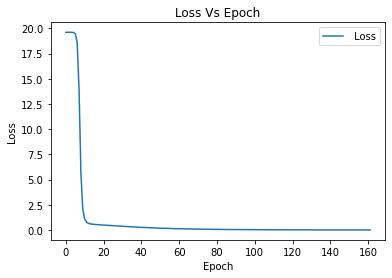

In [16]:
plt.plot(np.array(range(0,len(loss_momentum))),loss_momentum, label=' Loss')
plt.title('Loss Vs Epoch')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### <font color='blue'>Algorithm with ADAM update of weights</font>

In [17]:
def adam_update(W,dw,learning_rate,vt_prev,mt_prev,beta1,beta2,epoch):
    mt = (beta1*mt_prev) + ((1-beta1)*dw)
    vt = (beta2*vt_prev) + ((1-beta2)*(dw**2))
    m_hat = mt/(1-(beta1**epoch))
    v_hat = vt/(1-(beta2**epoch))
    W = W - ((learning_rate*(m_hat))/(np.sqrt(v_hat+0.0001)))
    return W,vt,mt

In [18]:
epochs = 1000
beta1 = 0.9
beta2 = 0.99
W = np.random.normal(0,0.01,9)
learning_rate = 0.01
loss_adam = []
vt = np.zeros(9)
mt = np.zeros(9)
for epoch in range(0,epochs):
    for index in range(0,len(X)):
        data_fp = forward_propagation(X[index],y[index],W)
        data_bp = backward_propagation(X[index],W,data_fp)
        dw = np.array([data_bp['dw1'],data_bp['dw2'],data_bp['dw3'],data_bp['dw4'],data_bp['dw5'],data_bp['dw6'],data_bp['dw7'],data_bp['dw8'],data_bp['dw9']])
        W,vt,mt = adam_update(W,dw,learning_rate,vt,mt,beta1,beta2,(epoch+1))
    loss_adam.append(calculateLoss(W))
    print("epoch:%d \t loss:%f"%(epoch,loss_adam[len(loss_adam)-1]))
    if((abs(loss_adam[len(loss_adam)-1] - loss_adam[len(loss_adam)-2] )< 0.0001) & (epoch>0)):
        break

epoch:0 	 loss:0.031910
epoch:1 	 loss:0.030569
epoch:2 	 loss:0.093152
epoch:3 	 loss:0.076276
epoch:4 	 loss:0.065288
epoch:5 	 loss:0.058908
epoch:6 	 loss:0.050812
epoch:7 	 loss:0.042416
epoch:8 	 loss:0.034656
epoch:9 	 loss:0.027731
epoch:10 	 loss:0.022061
epoch:11 	 loss:0.017729
epoch:12 	 loss:0.014192
epoch:13 	 loss:0.011209
epoch:14 	 loss:0.008897
epoch:15 	 loss:0.007231
epoch:16 	 loss:0.006061
epoch:17 	 loss:0.005232
epoch:18 	 loss:0.004631
epoch:19 	 loss:0.004179
epoch:20 	 loss:0.003830
epoch:21 	 loss:0.003551
epoch:22 	 loss:0.003322
epoch:23 	 loss:0.003129
epoch:24 	 loss:0.002964
epoch:25 	 loss:0.002821
epoch:26 	 loss:0.002693
epoch:27 	 loss:0.002579
epoch:28 	 loss:0.002475
epoch:29 	 loss:0.002379


<font color='blue'>Plot between epochs and loss</font>

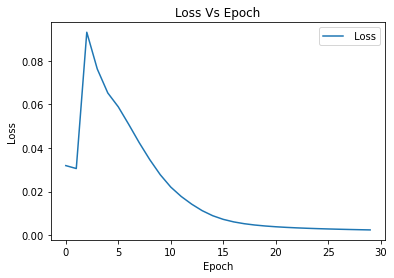

In [19]:
plt.plot(np.array(range(0,len(loss_adam))),loss_adam, label=' Loss')
plt.title('Loss Vs Epoch')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

<font color='blue'>Comparision plot between epochs and loss with different optimizers</font>

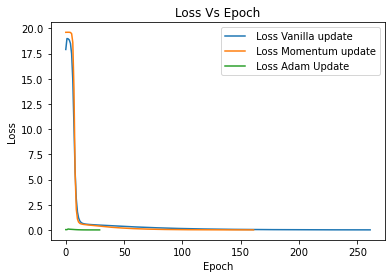

In [20]:
plt.plot(np.array(range(0,len(loss_vanilla))),loss_vanilla, label=' Loss Vanilla update')
plt.plot(np.array(range(0,len(loss_momentum))),loss_momentum, label=' Loss Momentum update')
plt.plot(np.array(range(0,len(loss_adam))),loss_adam, label=' Loss Adam Update')
plt.title('Loss Vs Epoch')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()